### To Predict whether Passenger survived the crash or not

In [119]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

## LOAD AND REVIEW DATA

In [120]:
pdata = pd.read_csv("train.csv")

In [121]:
pdata.shape

(891, 12)

In [122]:
pdata.head(7) # To check first 5 rows of data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [123]:
pdata.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [124]:
pdata.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [125]:
pdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Since 687 data are missing we can drop cabin

In [126]:
pdata.drop("Cabin",axis=1,inplace=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

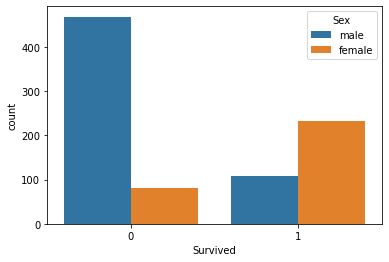

In [127]:
sns.countplot(x="Survived",hue="Sex",data=pdata)

<AxesSubplot:xlabel='Survived', ylabel='count'>

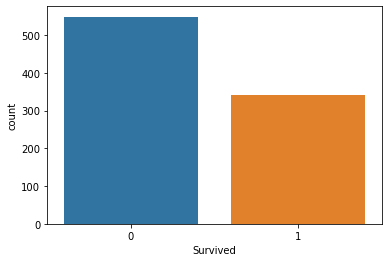

In [128]:
sns.countplot(x="Survived",data=pdata)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

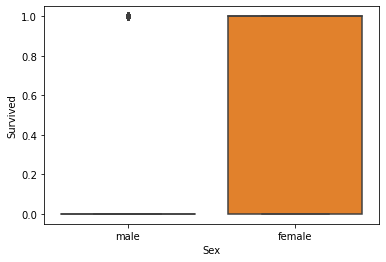

In [129]:
sns.boxplot(x="Sex",y="Survived",data=pdata)

# Visualising Missing Data

<AxesSubplot:>

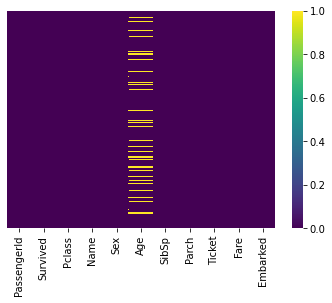

In [130]:
sns.heatmap(pdata.isnull(),yticklabels=False,cmap="viridis")

# Identifying Correlation

In [131]:
pdata.corr() # It will show correlation matrix 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Removing Irrelevant Data

In [132]:
pdata=pdata.drop(["Embarked","PassengerId","Name","Ticket"],axis=1)
pdata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


# Dummies

In [133]:
Sex=pd.get_dummies(pdata["Sex"],drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [134]:
pdata=pd.concat([pdata,Sex],axis=1)
pdata=pdata.drop(["Sex"],axis=1)
pdata.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


### Filling Age missing values with median

In [135]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
pdata = pdata.apply(medianFiller,axis=0)

pdata['Age'] = pdata['Age'].astype('float64')  # converting the hp column from object / string type to float
pdata.head(7)

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
5,0,3,28.0,0,0,8.4583,1
6,0,1,54.0,0,0,51.8625,1


### Split the Data

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [140]:
X=pdata.drop("Survived",axis=1)
y=pdata["Survived"]

In [141]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [142]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [143]:
predictions=model.predict(X_test)

In [144]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[139,  18],
       [ 32,  79]], dtype=int64)

<AxesSubplot:>

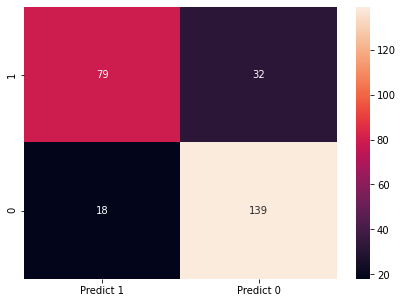

In [145]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8134328358208955